In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### 1. Read the data and print the data

In [2]:
# 1. Read the data and print the data

data = pd.read_csv('kerala.csv')
print("Data :\n", data)

Data :
     SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL     AUG  \
0        KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0   357.5   
1        KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0   315.8   
2        KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5   420.2   
3        KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5   351.8   
4        KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5   293.6   
..          ...   ...   ...   ...   ...    ...    ...     ...     ...     ...   
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0   454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8   563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4   522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5   498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8   625.4  1048.5  1398.9   

       SEP    OCT  

### 2. Display the head of data

In [3]:
print(data.head())

  SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0      KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1      KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2      KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3      KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4      KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   

     SEP    OCT    NOV    DEC   ANNUAL RAINFALL FLOODS  
0  197.7  266.9  350.8   48.4            3248.6    YES  
1  491.6  358.4  158.3  121.5            3326.6    YES  
2  341.8  354.1  157.0   59.0            3271.2    YES  
3  222.7  328.1   33.9    3.3            3129.7    YES  
4  217.2  383.5   74.4    0.2            2741.6     NO  


### 3. Display the tail of data

In [4]:
print(data.tail())

    SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY    JUN     JUL     AUG  \
113      KERALA  2014   4.6  10.3  17.9   95.7  251.0  454.4   677.8   733.9   
114      KERALA  2015   3.1   5.8  50.1  214.1  201.8  563.6   406.0   252.2   
115      KERALA  2016   2.4   3.8  35.9  143.0  186.4  522.2   412.3   325.5   
116     KERALA   2017   1.9   6.8   8.9   43.6  173.5  498.5   319.6   531.8   
117      KERALA  2018  29.1  52.1  48.6  116.4  183.8  625.4  1048.5  1398.9   

       SEP    OCT    NOV   DEC   ANNUAL RAINFALL FLOODS  
113  298.8  355.5   99.5  47.2            3046.4    YES  
114  292.9  308.1  223.6  79.4            2600.6     NO  
115  173.2  225.9  125.4  23.6            2176.6     NO  
116  209.5  192.4   92.5  38.1            2117.1     NO  
117  423.6  356.1  125.4  65.1            4473.0    YES  


### 4. Checking for null values

In [5]:
print("Null Values : \n",data.isnull().sum())

Null Values : 
 SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64


There are no NULL values in the dataset.

### 5. Change the target column of "FLOODS" to numeric values [yes: 1, no:0] and display the data

In [6]:
data['FLOODS'].replace(to_replace=dict(YES=1, NO=0), inplace=True)

for elem in data['FLOODS']:
    print(elem)

1
1
1
1
0
0
1
0
1
0
0
1
0
0
1
1
0
0
1
1
0
1
1
1
1
1
1
0
1
1
1
1
1
0
0
1
0
0
1
1
1
1
1
0
0
1
1
1
1
1
0
0
0
1
1
0
1
1
1
1
1
1
0
0
0
0
0
1
0
0
1
0
0
0
1
0
1
1
0
0
1
0
0
0
0
0
0
0
0
0
1
1
0
1
0
0
1
1
0
0
0
0
0
0
1
1
1
0
0
1
1
0
1
1
0
0
0
1


### 6. Find the correlation between various variables of dataset and display it

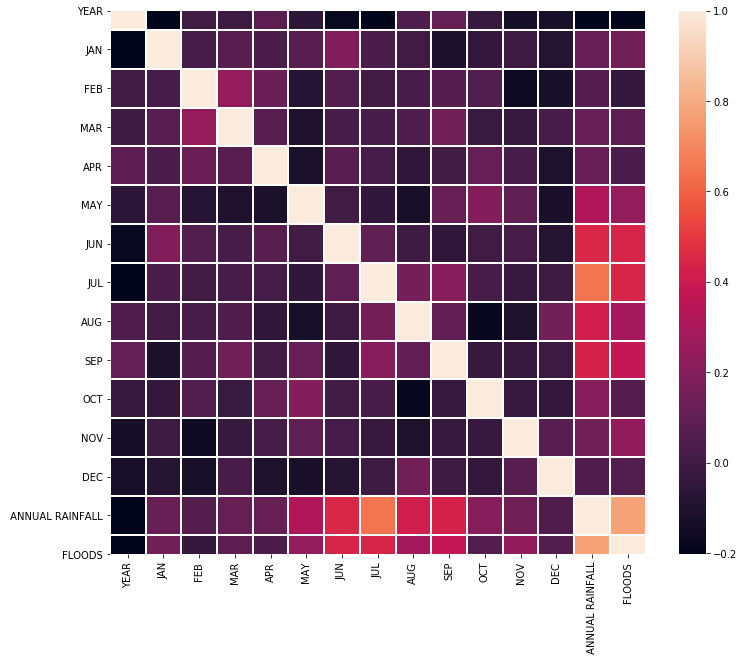

In [7]:
corr = data.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False,linewidths=1,robust=True)


As you can see from the above correlation matrix -

The correlation between columns - JUN, JUL, AUG, SEP and columns Annual Rainfall, Floods in higher, so we can say that the column during these month of givcen any year the chances of rainfall are highest.


### 7. Create binary data and present it in the tabular form

In [8]:
data["JUN_GT_500"] = (data["JUN"] > 500).astype("int")
data["JUL_GT_500"] = (data["JUL"] > 500).astype("int")
data_small = data.loc[:, ["YEAR", "JUN_GT_500", "JUL_GT_500", "FLOODS"]]
data_small["COUNT"] = 1
data_small.head()


,YEAR,JUN_GT_500,JUL_GT_500,FLOODS,COUNT
0,1901,1,1,1,1
1,1902,0,1,1,1
2,1903,1,1,1,1
3,1904,1,1,1,1
4,1905,1,1,0,1


In [9]:
pd.crosstab(data_small["FLOODS"], data_small["JUN_GT_500"])


JUN_GT_500,0,1
FLOODS,,
0,19,39
1,6,54


### 8. Calculate probability of flood given it rained more than 500mm in June.

- P(FLOODS):        Probability of flooding
- P(JUNE):          Probability of having more than 500 mm rain in June
- P(FLOODS ∩ JUNE): Probability of flooding and having more than 500 mm rain in June
- P(FLOODS|JUNE):   Probability of flooding given it rained more than 500 mm in June

In [10]:
P_FLOODS = (6 + 54) / (6 + 54 + 19 + 39)
P_JUNE = (39 + 54) / (6 + 54 + 19 + 39)
P_FLOODS_intersect_JUNE = 54 / (6 + 54 + 19 + 39)

print(f"P(FLOODS): {P_FLOODS}") 
print(f"P(JUNE): {P_JUNE}")
print(f"P(FLOODS AND JUNE): {P_FLOODS_intersect_JUNE}")

P(FLOODS): 0.5084745762711864
P(JUNE): 0.788135593220339
P(FLOODS AND JUNE): 0.4576271186440678


In [11]:
# Now calculating probailitity of flood given it rained more than 500 mm in June i.e (P(A|B))
P_FLOODS_JUNE = P_FLOODS_intersect_JUNE / P_JUNE
print("Probability of flood given it rained more than 500mm in June : ")
print(f"P(FLOODS|JUNE): {P_FLOODS_JUNE}")

Probability of flood given it rained more than 500mm in June : 
P(FLOODS|JUNE): 0.5806451612903226


### 9. Given that it flooded in Kerala in a year,what is the probability that it rained more than 500 mm in the month of June or July?

In Bayesian inference, `P(B)` is called **Prior Probability**. 
In our case, `P(JUNE)` or `P(JULY)` is the prior probability which tells the probability of rain more than 500 mm in June (or July) without knowing whether it flooded or not that year."

In [12]:
# Probability of rain more than 500 mm in June given it flooded that year (P(B|A))
P_JUNE_FLOODS = (P_FLOODS_JUNE * P_JUNE) / P_FLOODS

print("The probability that it rained more than 500 mm in the month of June : ")
print(f"P(JUNE|FLOODS): {P_JUNE_FLOODS}")

The probability that it rained more than 500 mm in the month of June : 
P(JUNE|FLOODS): 0.9000000000000001


In [13]:
pd.crosstab(data_small["FLOODS"], data_small["JUL_GT_500"])

JUL_GT_500,0,1
FLOODS,,
0,19,39
1,3,57


In [14]:
P_FLOOD = (3 + 57) / (3 + 57 + 19 + 39)
P_JULY = (39 + 57) / (3 + 57 + 19 + 39)
P_FLOOD_intersect_JULY = 57 / (3 + 57 + 19 + 39)
print(f"P(FLOOD): {P_FLOOD}") 
print(f"P(JULY): {P_JULY}")
print(f"P(FLOOD AND JULY): {P_FLOOD_intersect_JULY}")

P(FLOOD): 0.5084745762711864
P(JULY): 0.8135593220338984
P(FLOOD AND JULY): 0.4830508474576271


In [15]:
# Now calculate probailitity of flood given it rained more than 500 mm in July
P_FLOOD_JULY = P_FLOOD_intersect_JULY / P_JULY
print(f"P(FLOOD|JULY): {P_FLOOD_JULY}")

P(FLOOD|JULY): 0.59375


In [16]:
# Probability of rain more than 500 mm in July given it flooded that year (P(B|A))
P_JULY_FLOOD = (P_FLOOD_JULY * P_JULY) / P_FLOOD

print("The probability that it rained more than 500 mm in the month of July : ")
print(f"P(JULY|FLOOD): {P_JULY_FLOOD}")

The probability that it rained more than 500 mm in the month of July : 
P(JULY|FLOOD): 0.9500000000000002


### 10. Design a Machine Learning Algorithm to predict the chances of flood in the state of kerala in the future years. Display the result, mention accuracy, error that you obtained.

In [17]:
data = data.drop(['JUN_GT_500'], 1)
data = data.drop(['JUL_GT_500'], 1)
data = data.drop(['SUBDIVISION'], 1)

In [18]:
data

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL RAINFALL,FLOODS
0,1901,28.7,44.7,51.6,160.0,174.7,824.6,743.0,357.5,197.7,266.9,350.8,48.4,3248.6,1
1,1902,6.7,2.6,57.3,83.9,134.5,390.9,1205.0,315.8,491.6,358.4,158.3,121.5,3326.6,1
2,1903,3.2,18.6,3.1,83.6,249.7,558.6,1022.5,420.2,341.8,354.1,157.0,59.0,3271.2,1
3,1904,23.7,3.0,32.2,71.5,235.7,1098.2,725.5,351.8,222.7,328.1,33.9,3.3,3129.7,1
4,1905,1.2,22.3,9.4,105.9,263.3,850.2,520.5,293.6,217.2,383.5,74.4,0.2,2741.6,0
5,1906,26.7,7.4,9.9,59.4,160.8,414.9,954.2,442.8,131.2,251.7,163.1,86.0,2708.0,0
6,1907,18.8,4.8,55.7,170.8,101.4,770.9,760.4,981.5,225.0,309.7,219.1,52.8,3671.1,1
7,1908,8.0,20.8,38.2,102.9,142.6,592.6,902.2,352.9,175.9,253.3,47.9,11.0,2648.3,0
8,1909,54.1,11.8,61.3,93.8,473.2,704.7,782.3,258.0,195.4,212.1,171.1,32.3,3050.2,1
9,1910,2.7,25.7,23.3,124.5,148.8,680.0,484.1,473.8,248.6,356.6,280.4,0.1,2848.6,0


In [19]:
# Splitting Data into X and Y arrays

X = np.array(data.drop(["FLOODS"], 1))
y = np.array(data["FLOODS"])

In [20]:
# Splitting the data into training and test data

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 10)

In [21]:
# Normalizing the data
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit(X_train).transform(X_train)
X_test = MinMaxScaler().fit(X_test).transform(X_test)

In [22]:
# Implmenting Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Predicting the test set results and calculating the accuracy

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.83


In [24]:
# Checking the RMSE Error
from sklearn.metrics import mean_squared_error

print("Root Mean Squared Error (RMSE) : ", np.sqrt(mean_squared_error(y_test, y_pred)))

Root Mean Squared Error (RMSE) :  0.408248290463863
